<a href="https://colab.research.google.com/github/HoangHungLN/MachineLearning_Assigment/blob/main/notebooks/Assignment1_CEML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
##Xử lý dữ liệu

#Import thư viện
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

#Cấu hình style cho biểu đồ
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

#Tải module từ github về colab
!mkdir modules
!wget https://raw.githubusercontent.com/HoangHungLN/MachineLearning_Assigment/refs/heads/main/modules/__init__.py -O modules/__init__.py
!wget https://raw.githubusercontent.com/HoangHungLN/MachineLearning_Assigment/refs/heads/main/modules/feature_extractors.py -O modules/feature_extractors.py
!wget https://raw.githubusercontent.com/HoangHungLN/MachineLearning_Assigment/refs/heads/main/modules/model_runner.py -O modules/model_runner.py

#Import các hàm trong feature_extractors va model_runner
from modules.model_runner import *
from modules.feature_extractors import *

#Tải dữ liệu bảng CSV từ github
!mkdir data
!wget https://raw.githubusercontent.com/HoangHungLN/MachineLearning_Assigment/refs/heads/main/data/mobiles_uncleaned.csv -O data/mobiles_uncleaned.csv
raw_data = pd.read_csv("data/mobiles_uncleaned.csv")
raw_data.replace({r'â€‰':'', r'\u2009': ''}, regex=True, inplace=True)

#In thử 5 dòng đầu
raw_data.head(5)

mkdir: cannot create directory ‘modules’: File exists
--2025-09-19 09:10:14--  https://raw.githubusercontent.com/HoangHungLN/MachineLearning_Assigment/refs/heads/main/modules/__init__.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 456 [text/plain]
Saving to: ‘modules/__init__.py’

modules/__init__.py 100%[===================>]     456  --.-KB/s    in 0s      

2025-09-19 09:10:14 (8.90 MB/s) - ‘modules/__init__.py’ saved [456/456]

--2025-09-19 09:10:14--  https://raw.githubusercontent.com/HoangHungLN/MachineLearning_Assigment/refs/heads/main/modules/feature_extractors.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.

,name,price,spec_score,user_rating,connectivity,cpu,ram,battery,display,camera,expandable,os,fm_radio,other
0,Samsung Galaxy S24 FE 5G,34999,84.0,4.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Exynos 2400e, Deca Core, 3.11GHz Processor","8GB RAM, 128GB inbuilt",4700mAh Battery with 25W Fast Charging,"6.7 inches, 1080x2340px, 120 Hz Display with P...",50MP + 12MP + 8MP Triple Rear & 10MP Front Camera,Memory Card Not Supported,Android v14,NaN,NaN
1,Samsung Galaxy S24 Ultra,84949,92.0,4.35,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen3, Octa Core, 3.3GHz Processor","12GB RAM, 256GB inbuilt",5000mAh Battery with 45W Fast Charging,"6.8 inches, 1440x3120px, 120 Hz Display with P...",200MP Quad Rear & 12MP Front Camera,Memory Card Not Supported,Android v14,NaN,NaN
2,Samsung Galaxy S25 Edge,109999,89.0,4.45,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8Elite, Octa Core, 4.47GHz Processor","12GB RAM, 256GB inbuilt",3900mAh Battery with 25W Fast Charging,"6.7 inches, 1440x3120px, 120 Hz Display with P...",200MP + 12MP Dual Rear & 12MP Front Camera,NaN,Android v15,No FM Radio,NaN
3,Samsung Galaxy M36 5G,19990,82.0,4.55,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Exynos 1380, Octa Core, 2.4GHz Processor","8GB RAM, 128GB inbuilt",6500mAh Battery with 25W Fast Charging,"6.74 inches, 1080x2340px, 120 Hz Display with ...",50MP + 12MP + 5MP Triple Rear & 16MP Front Camera,"Memory Card (Hybrid), upto 1TB",Android v15,NaN,NaN
4,Samsung Galaxy M06 5G,7999,72.0,4.00,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 6300, Octa Core, 2.4GHz Processor","4GB RAM, 128GB inbuilt",5000mAh Battery with 25W Fast Charging,"6.74 inches, 720x1600px, 90 Hz Display with Wa...",50MP + 2MP Dual Rear & 8MP Front Camera,"Memory Card (Hybrid), upto 1.5TB",Android v15,NaN,NaN


In [41]:
  #Kiểm tra số lượng mẫu và thuộc tính gốc của dữ liệu
  print("Số lượng mẫu có trong dataset là:", raw_data.shape[0])
  print("Số lượng thuộc tính có trong dataset là:", raw_data.shape[1])

Số lượng mẫu có trong dataset là: 11786
Số lượng thuộc tính có trong dataset là: 14


Trong bộ dữ liệu này, các thuộc tính bị thiếu được kí hiệu là NULL, sau đây nhóm em sẽ tiến hành chuyển dữ liệu thiếu thành NaN để dễ thống kê

In [42]:
#Thay toàn bộ NULL thành NaN, thống kê missing value
raw_data.replace("NULL", np.nan, inplace=True)
missing_count = raw_data.isna().sum()
print(missing_count)

name                0
price               0
spec_score          8
user_rating        20
connectivity       11
cpu              2157
ram              1261
battery           138
display            16
camera             20
expandable       1770
os               2963
fm_radio        10229
other           11785
dtype: int64


Để trực quan hóa thì nhóm sẽ tạo dữ liệu dạng bảng để thống kê các giá trị bị thiếu
  

In [43]:
#Tính missing_rate cho từng cột
missing_rate = (missing_count / len(raw_data) * 100).round(2)
missing_data = pd.DataFrame({'Missing Count': missing_count, 'Missing Rate': missing_rate}).sort_values(by='Missing Rate', ascending=False)
missing_data.index.name = 'Feature'
#In ra bảng thống kê missing value
missing_data

,Missing Count,Missing Rate
Feature,,
other,11785,99.99
fm_radio,10229,86.79
os,2963,25.14
cpu,2157,18.30
expandable,1770,15.02
ram,1261,10.70
battery,138,1.17
user_rating,20,0.17
camera,20,0.17


In [44]:
print ("\n-----------------------------------------------------------------------------------Describe (numeric)--------------------------------------------------------------------------------------------")
#Thống kê mô tả cho các cột numeric
mum_summary = raw_data.describe().round(2).T.reset_index()
mum_summary = mum_summary.rename(columns={'index': 'Feature'}).set_index('Feature')
mum_summary



-----------------------------------------------------------------------------------Describe (numeric)--------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Feature,,,,,,,,
price,11786.0,17187.61,23707.84,178.0,3000.00,9490.00,20999.0,480000.0
spec_score,11778.0,51.94,26.66,3.0,24.00,58.00,76.0,98.0
user_rating,11766.0,4.18,0.48,0.5,4.05,4.25,4.5,5.0


Khi chạy lệnh nêu các đặc trưng của các biến định lượng thì ra thấy được rằng


1.   Về thuộc tính giá (price)

  *   Giá trị trung bình của các điện thoại là 117187,61

  *   Độ lệch chuẩn của thuộc tính khá lớn (23707,84) cho thấy dữ liệu phân tán mạnh, không tập trung xung quanh giá trị trung bình
  
  * Nhiều khả năng tồn tại giá trị ngoại lai với mức giá quá cao hoặc quá thấp,dẫn đến phân phối bị lệch và kéo giá trị trung bình lên khá cao so với giá trị trung vị 9490


2.   Về thuộc tính điểm cấu hình (spec_score)

  * Giá trị trung bình của điểm cấu hình là 51,94 điểm, trung vị là 58 điểm
  * Độ lệch chuẩn là 26,66 được xem là khá lớn so với thang điểm 100, điều này có thấy dữ liệu trải rộng
  *Nhìn chung, vì giá trị trung bình nhỏ hơn trung vị nên phân phối có xu hướng lệch trái, nhưng vẫn cần sử dụng đồ thij để trực quan hơn

3. Về thuộc tính đánh giá của khách hàng (user_rating)
* Giá trị trung bình của đánh giá người dùng là 4.18 trên thang điểm 5, với trung vị là 4,25
* Độ lệch chuẩn nhỏ (0.48) cho thấy tập dữ liệu tập trung xung quanh giá trị trung bình
* Phân phối nghiên về các giá trị cao cho thấy điện thoại trong tập dữ liệu nhận được nhiều đánh giá tích cực từ người dùng, ít khi bị điểm thấp


In [45]:
#Thống kê mô tả cho các cột Categorical
cat_summary = raw_data.describe(include='object').T.reset_index()  # transpose để cột thành hàng
cat_summary = cat_summary.rename(columns={'index': 'Feature'}).set_index('Feature') #đổi tên cột index thành Feature
print ("\n-----------------------------------------------------------------------------------Describe (categorical)--------------------------------------------------------------------------------------------")
cat_summary


-----------------------------------------------------------------------------------Describe (categorical)--------------------------------------------------------------------------------------------


,count,unique,top,freq
Feature,,,,
name,11786,11468,Realme 9i 5G (6GB RAM + 128GB),3
connectivity,11775,68,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",2554
cpu,9629,1461,"Quad Core, 1.3GHz Processor",399
ram,10525,443,"8GB RAM, 128GB inbuilt",1143
battery,11648,955,1000mAh Battery,695
display,11770,1751,"2.4 inches, 240x320px Display",681
camera,11766,1142,0.3MP Rear Camera,1227
expandable,10016,31,"Memory Card Supported, upto 32GB",2261
os,8823,184,Android v11,818


Khi chạy thống kê mô tả của các biến định tính ta thấy rằng:
* _name_ : có 11,468 giá trị duy nhất trên 11,786 dòng (gần như mỗi dòng là một model khác nhau). Điều này làm cột này không hữu ích để phân tích thống kê hoặc mô hình hóa (có thể bỏ hoặc chỉ dùng để tham khảo).

* _connectivity_ : gồm 68 loại, trong đó phổ biến nhất là “Dual Sim, 3G, 4G, VoLTE, Wi-Fi” (≈ 2,554 bản ghi). Đây là một thuộc tính có thể mã hóa và sử dụng.

* _cpu_ : có 1,461 loại, phổ biến nhất là “Quad Core, 1.3 GHz Processor” (~399 bản ghi). Tuy nhiên cột này có nhiều missing values (chỉ 9,629/11,786 bản ghi).

* _ram_ : gồm 443 loại, phổ biến nhất “8 GB RAM, 128 GB inbuilt” (~1,143 bản ghi). Thuộc tính này khá chi tiết nhưng còn phân mảnh nhiều.

* _battery_ : gồm 955 loại, phổ biến nhất “1000 mAh Battery” (~695 bản ghi). Có nhiều kiểu pin khác nhau, dữ liệu phân tán.

* _display_ : gồm 1,751 loại, phổ biến nhất “2.4 inches, 240x320px Display” (~681 bản ghi). Đa dạng, có thể cần chuẩn hóa (inch + độ phân giải tách riêng).

* _camera_ : gồm 1,142 loại, phổ biến nhất “0.3 MP Rear Camera” (~1,227 bản ghi). Dữ liệu có xu hướng cụ thể nhưng nhiều dạng trình bày khác nhau.

* _expandable_ : gồm 31 loại, phổ biến nhất “Memory Card Supported, upto 32GB” (~2,261 bản ghi). Đây là một biến categorical khá gọn.

* _os_ : gồm 184 loại, phổ biến nhất “Android v11” (~818 bản ghi). Có nhiều phiên bản Android khác nhau, cần chuẩn hóa nhóm.

* _fm_radio_ : dữ liệu khá thiếu, chỉ 1,557 bản ghi có thông tin (toàn bộ là “No FM Radio”). Giá trị phân loại này không đa dạng.

* _other_ : toàn bộ chỉ có một giá trị “Wi-Fi” → không có giá trị phân biệt, có thể bỏ khỏi mô hình

Qua đây ta có nhận xét rằng: Các thuộc tính như tên sản phẩm (name), fm radio và other có thể cân nhắc để loại bỏ ra khỏi mô hình. Ngoài ra cần chuẩn hóa các thuộc tính khác để có thể đem lại kết quả tốt nhất khi huấn luyện mô hình

Nhóm em tiến hành vẽ các biểu đồ để nhận xét mối quan hệ giữa các biến

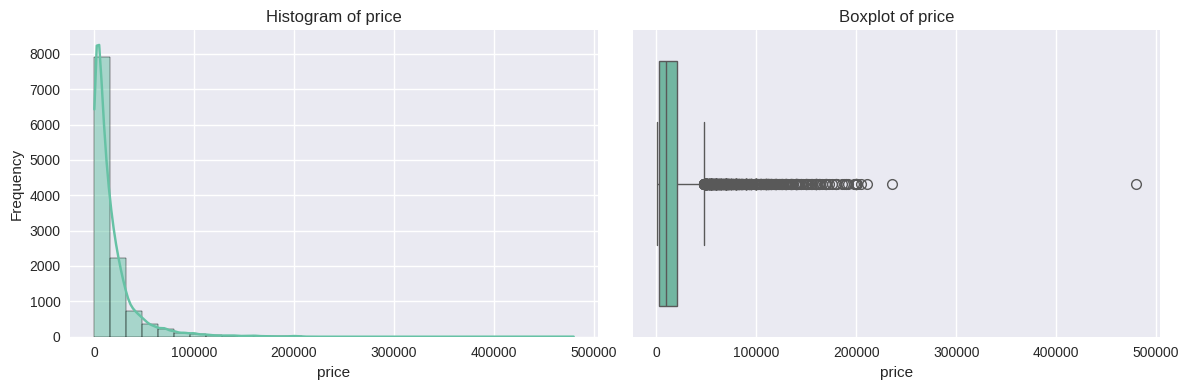

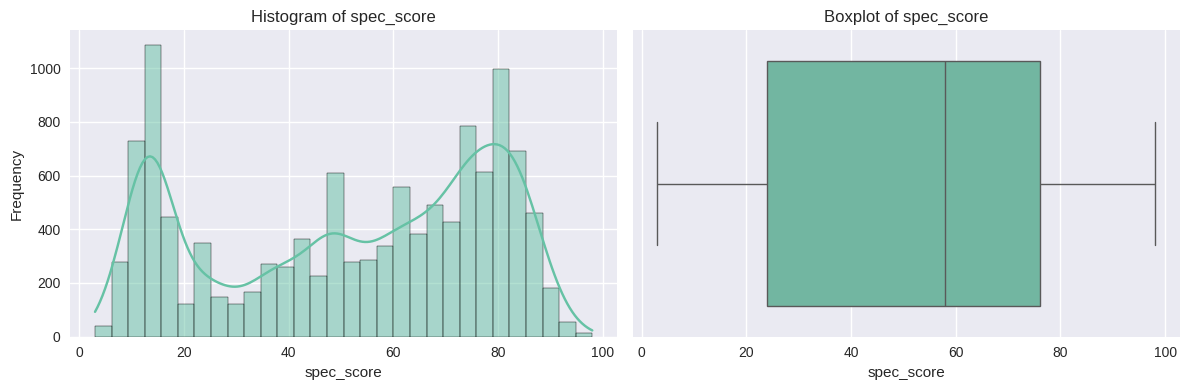

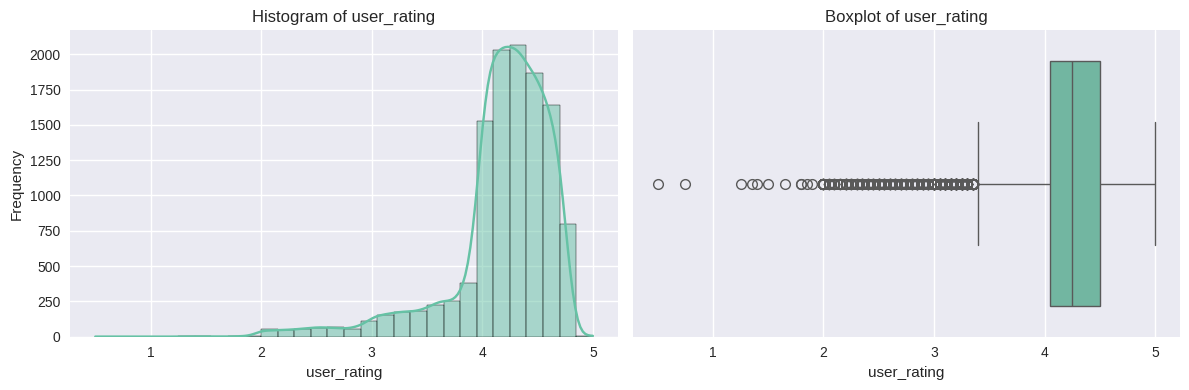

In [46]:
# Lấy danh sách các cột dạng numerical
num_cols = raw_data.select_dtypes(include='number').columns

# Vẽ biểu đồ cho từng Numeric
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))  # 1 hàng 2 cột

    # Histogram + KDE
    # Vẽ histogram phân phối giá trị của cột + đường KDE (đường cong mật độ xác suất ước lượng)
    sns.histplot(raw_data[col], kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")

    # Boxplot
    # Vẽ boxplot để phát hiện phân phối và outlier
    sns.boxplot(x=raw_data[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")
    axes[1].set_xlabel(col)

    # Căn chỉnh layout cho đẹp
    plt.tight_layout()
    plt.show()

**Nhận xét và đánh giá biểu đồ**

1. Price

- Biểu đồ histogram cho thấy phân phối giá bị lệch phải mạnh, phần lớn các sản phẩm có giá tập trung ở mức thấp dưới 20,000, trong khi vẫn tồn tại một số mẫu có giá trị rất cao kéo dài đến gần 500,000.

- Boxplot cho thấy sự xuất hiện của rất nhiều ngoại lai (outliers) ở mức giá cao, có thể do các dòng sản phẩm flagship hoặc do dữ liệu nhập liệu chưa đồng nhất.

- Như vậy, biến giá không có phân phối chuẩn, tồn tại nhiều ngoại lai và cần được xử lý, ví dụ bằng biến đổi logarit hoặc phân loại thành các nhóm giá trị.

2. Spec Score

- Histogram cho thấy phân phối khá đồng đều, có nhiều cụm điểm nổi bật, phản ánh việc nhiều sản phẩm có cùng cấu hình nên nhận cùng mức điểm.

- Boxplot thể hiện dữ liệu phân bố trong khoảng 20–80 là chủ yếu, không có nhiều ngoại lai.

- Đây là biến tương đối ổn định, phản ánh được sự đa dạng từ điện thoại cấu hình thấp đến cao, có thể sử dụng trực tiếp cho mô hình.

3. User Rating

- Histogram cho thấy phân phối lệch trái, phần lớn các đánh giá tập trung trong khoảng 4–5 sao, thể hiện xu hướng người dùng thường cho điểm cao.

- Boxplot xuất hiện một số ngoại lai ở mức 1–2 sao, phản ánh các trường hợp người dùng không hài lòng.

- Như vậy, biến đánh giá người dùng có tính thiên lệch tích cực, cần được chuẩn hóa hoặc xem xét loại bỏ ngoại lai khi sử dụng trong mô hình dự báo.

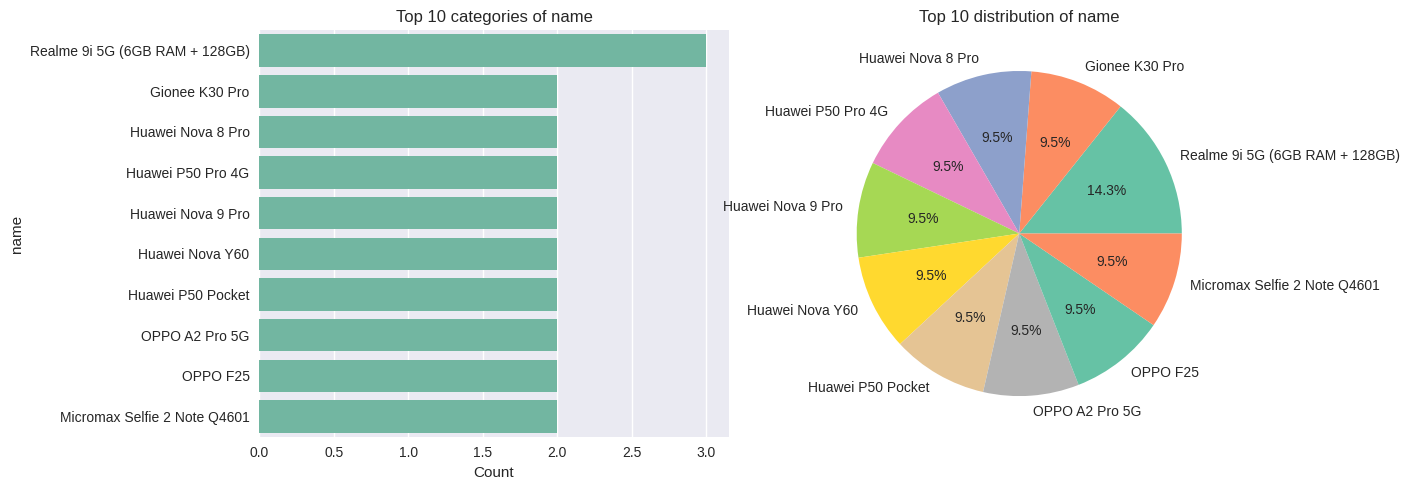

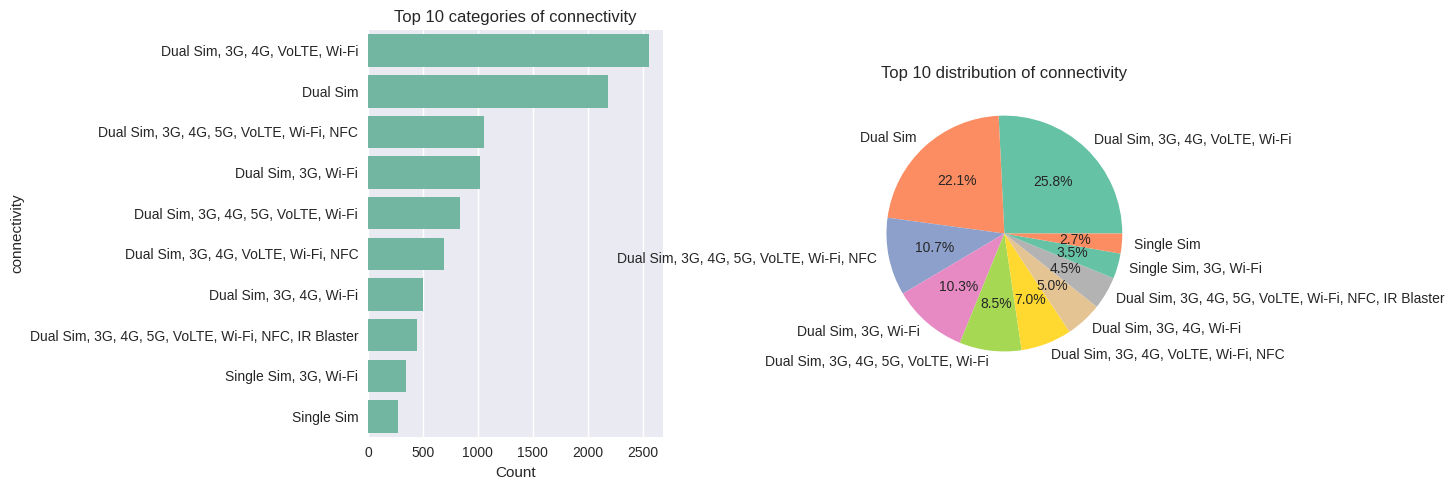

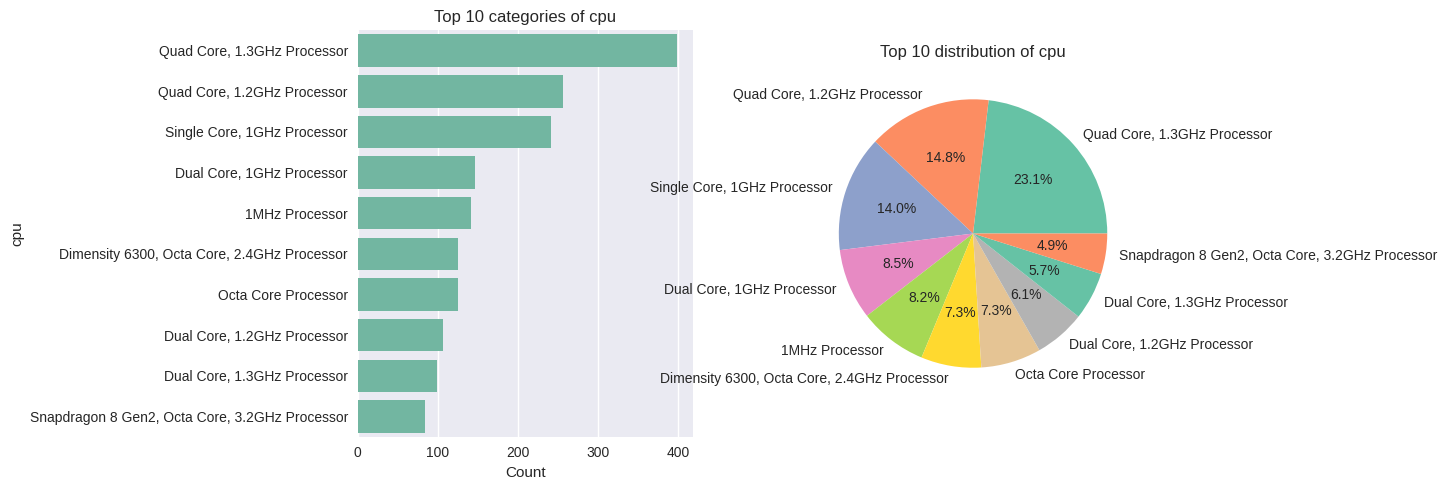

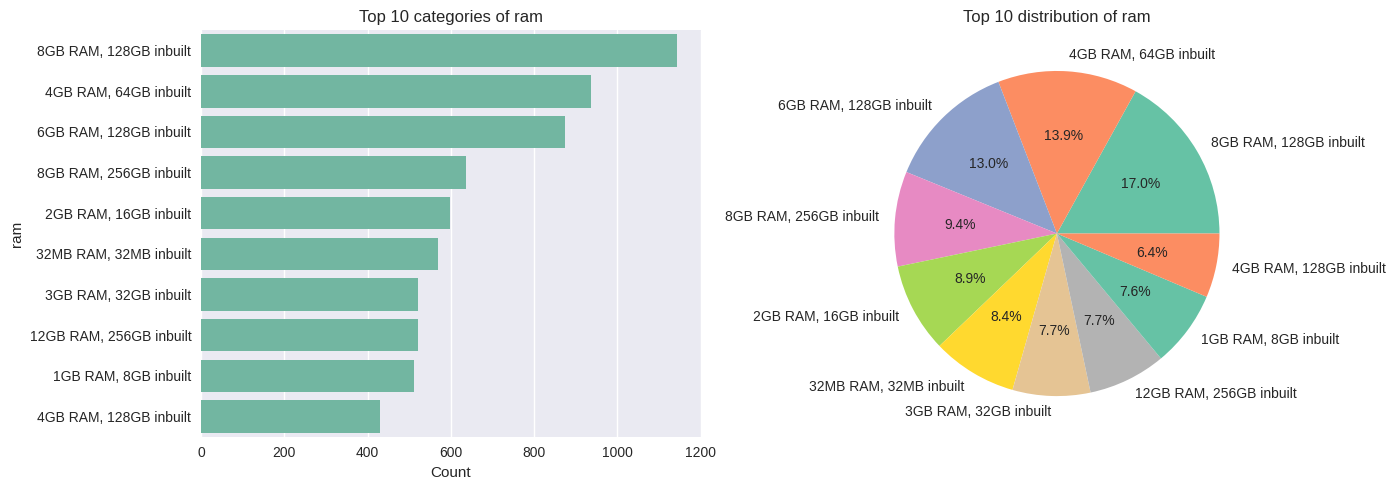

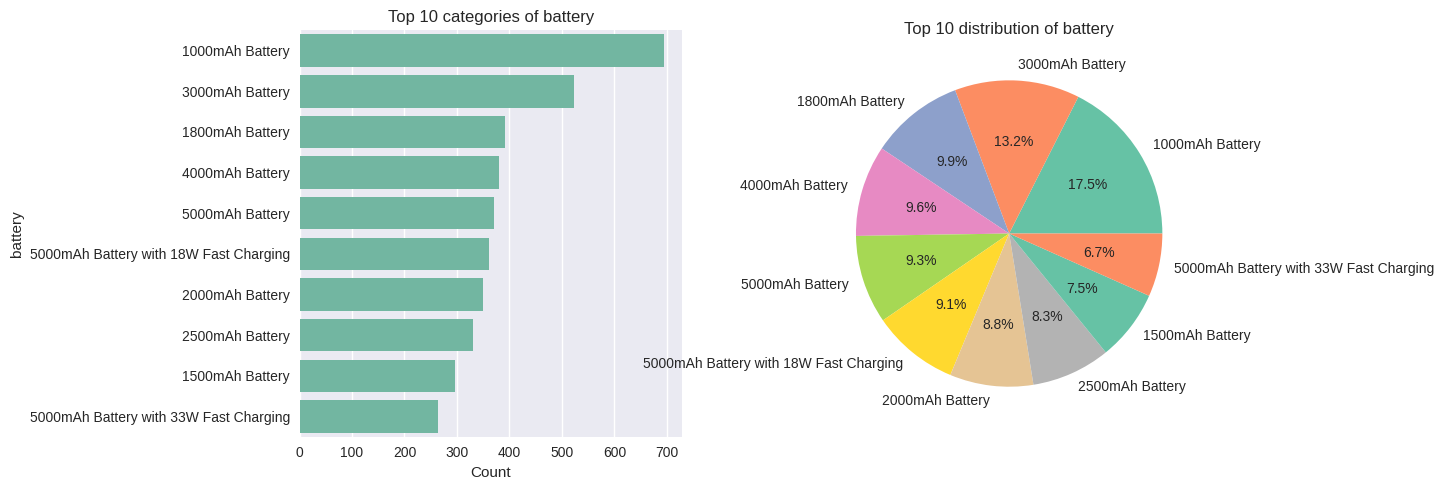

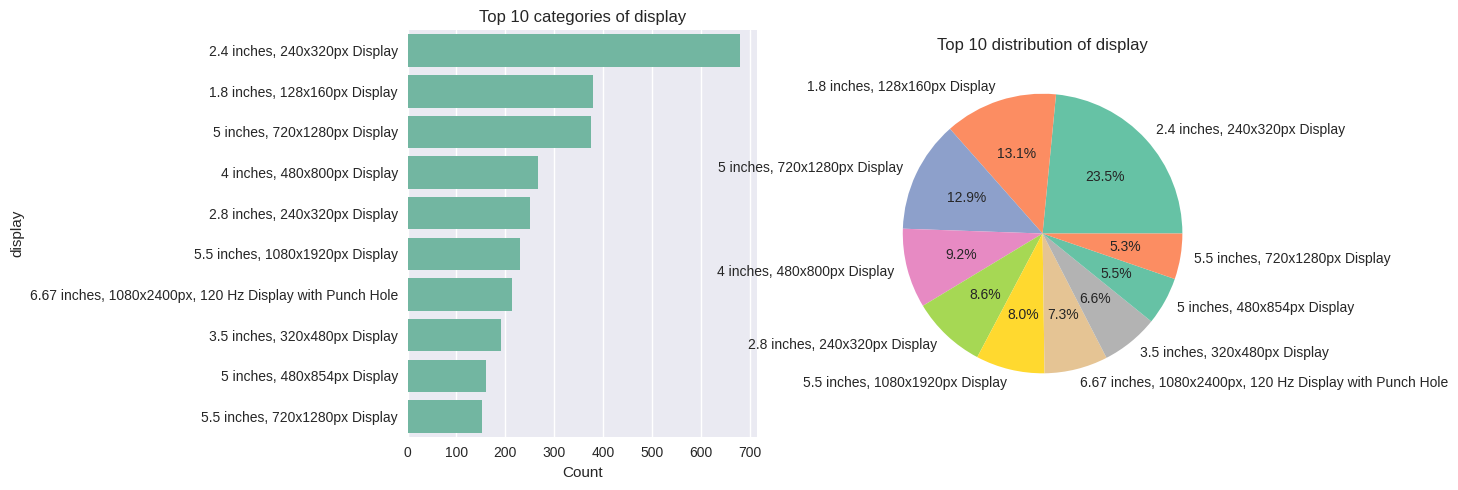

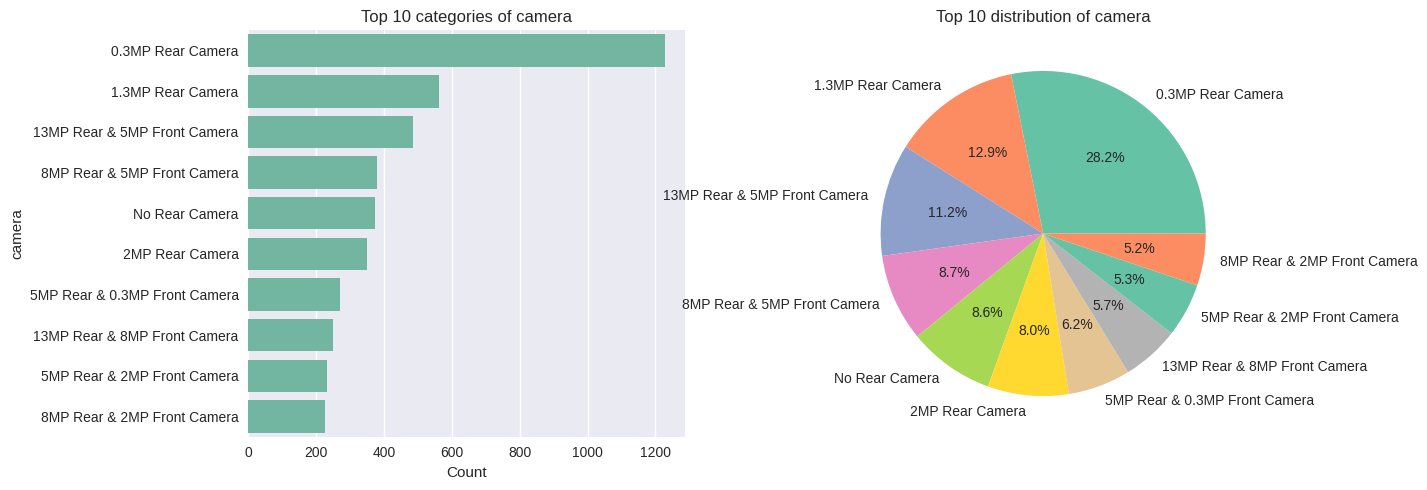

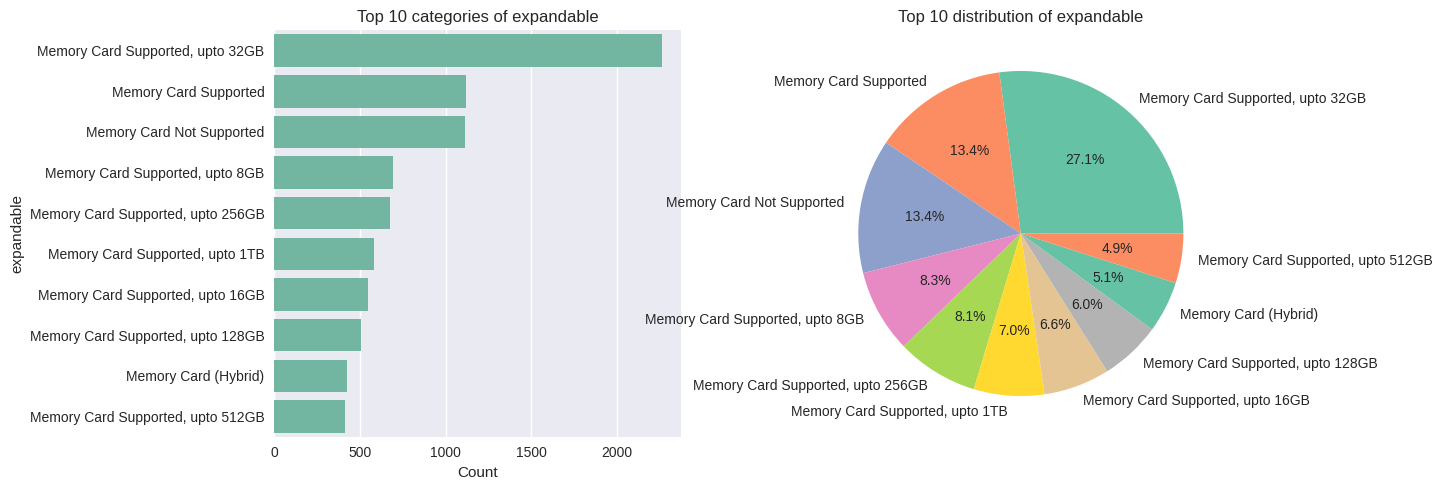

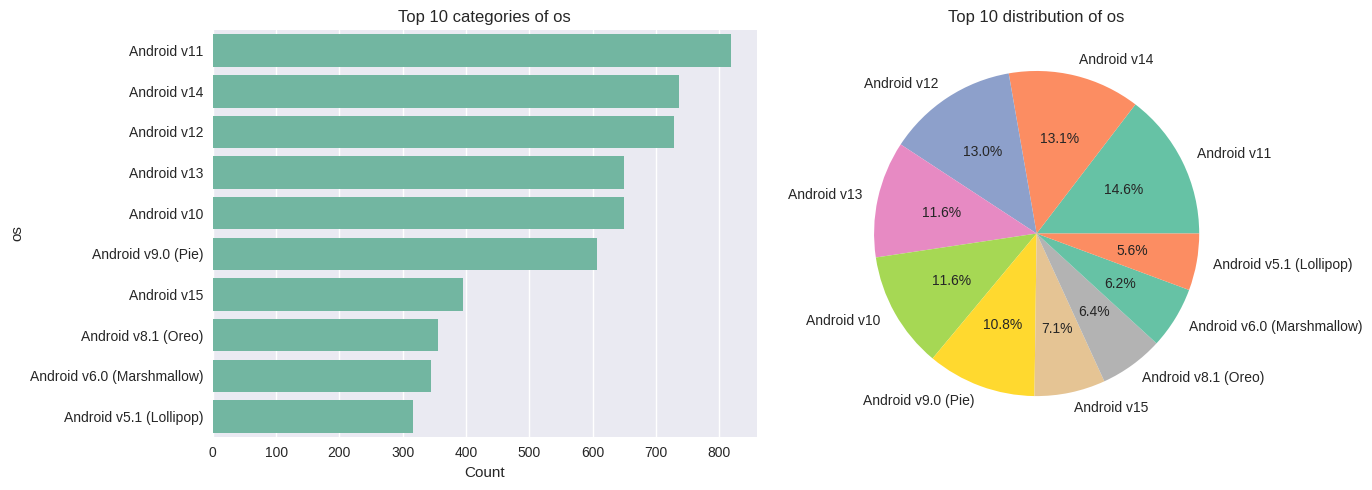

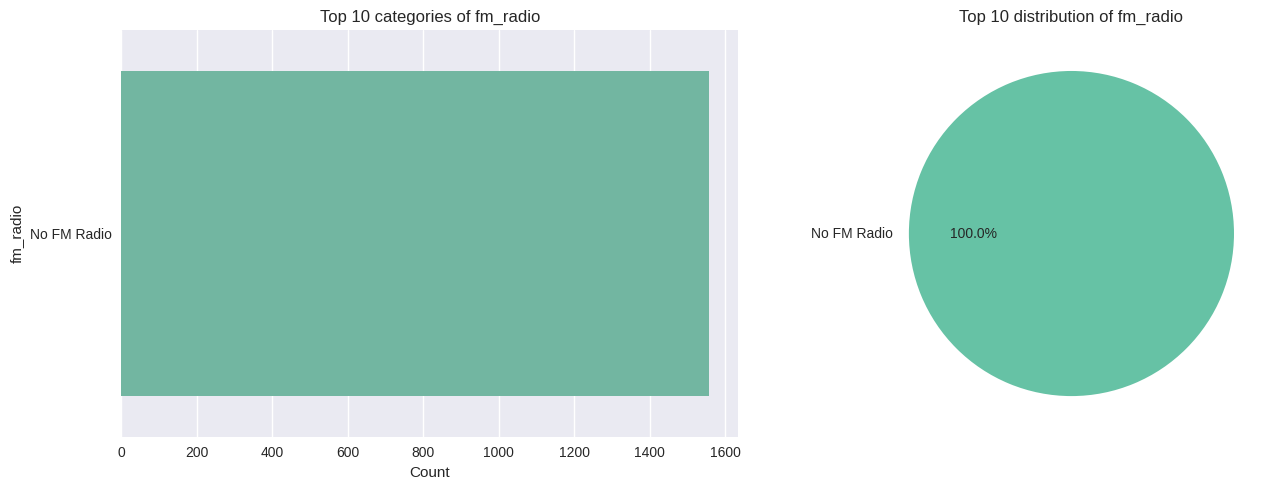

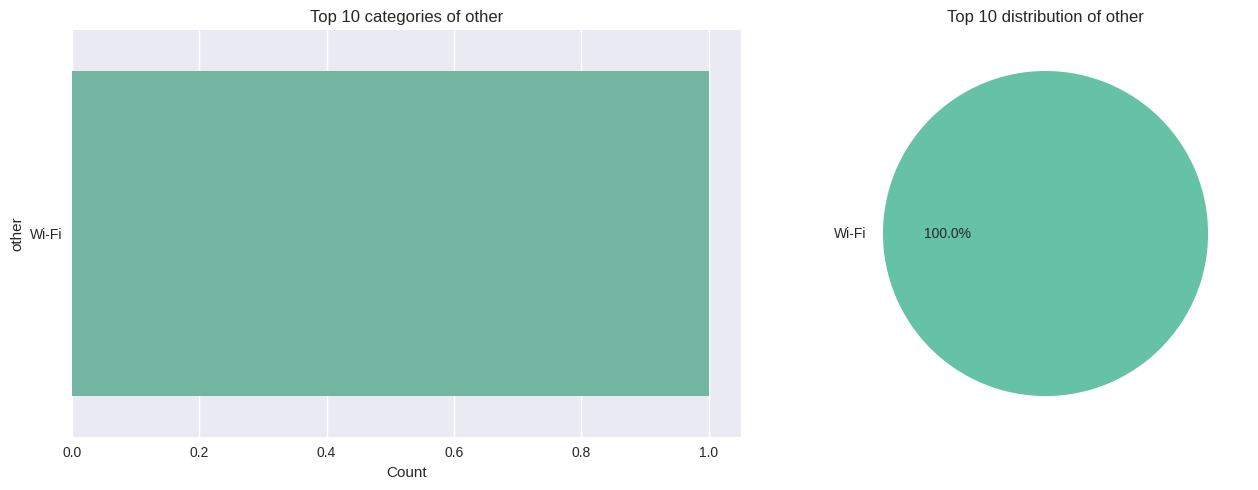

In [47]:
# Lấy danh sách các cột dạng categorical
cat_cols = raw_data.select_dtypes(exclude='number').columns

# Vẽ biểu đồ cho từng cột categorical
for col in cat_cols:
    # Lấy top 10 giá trị phổ biến nhất cho gọn
    value_counts = raw_data[col].value_counts().head(10)

    fig, axes = plt.subplots(1, 2, figsize=(14,5))  # 1 hàng, 2 cột

    # Countplot
    # Vẽ biểu đồ cột thể hiện số lượng (count) của từng giá trị trong top 10
    sns.countplot(y=col,
                  data=raw_data,
                  order=value_counts.index,
                  ax=axes[0])
    axes[0].set_title(f"Top 10 categories of {col}")
    axes[0].set_xlabel("Count")
    axes[0].set_ylabel(col)

    # Pie chart
    # Vẽ biểu đồ tròn cho thấy tỉ lệ phần trăm của top 10 giá trị phổ biến
    axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    axes[1].set_title(f"Top 10 distribution of {col}")

    plt.tight_layout()
    plt.show()

**Nhận xét và đánh giá biểu đồ**

1. name

- Có tới hơn 11.000 giá trị duy nhất, hầu như mỗi dòng dữ liệu là một model khác nhau.

- Các sản phẩm phổ biến nhất chỉ xuất hiện 2–3 lần, chiếm tỷ trọng rất nhỏ.

- Nhận xét: Biến này không mang nhiều giá trị phân tích vì quá phân tán, chỉ nên dùng để tham khảo hoặc loại bỏ trong mô hình dự báo.

2. connectivity

- Phổ biến nhất là Dual Sim, 3G, 4G, VoLTE, Wi-Fi (≈ 25,8%).

- Dual Sim nói chung chiếm đa số, phản ánh đúng đặc điểm thị trường Ấn Độ với nhu cầu dùng nhiều SIM.

- Nhận xét: Đây là biến quan trọng, có thể rút gọn thành nhóm (Single Sim vs Dual Sim, 3G/4G/5G) để tăng tính khái quát.

3. cpu

- Loại phổ biến nhất: Quad Core, 1.3 GHz Processor (~23%).

- Ngoài ra có nhiều biến thể nhỏ lẻ (Octa Core, Snapdragon 8 Gen2, v.v.).

- Nhận xét: Dữ liệu CPU bị phân mảnh, cần chuẩn hóa thành các nhóm (Single, Dual, Quad, Octa, Deca) và tốc độ (GHz) để phân tích tốt hơn.

4. ram

- Phổ biến nhất: 8GB RAM, 128GB inbuilt (~17%).

- Các cấu hình phổ biến tập trung quanh 4GB–8GB RAM, phản ánh mặt bằng chung của smartphone tầm trung.

- Nhận xét: Đây là biến hữu ích, có thể tách thành hai cột độc lập: RAM và ROM để phân tích sâu.

5. battery

- Phổ biến nhất: 1000 mAh và 3000 mAh.

- Tuy nhiên, nhiều mẫu mới có pin 4000–5000 mAh, thậm chí kèm sạc nhanh.

- Nhận xét: Cần chuẩn hóa thành biến số (battery capacity, fast charging yes/no) để khai thác giá trị.

6. display

- Loại phổ biến nhất: 2.4 inches, 240x320px (~23,5%).

- Có sự phân hóa rõ rệt: nhiều mẫu điện thoại phổ thông (2–3 inch) và smartphone hiện đại (5–6.7 inch).

- Nhận xét: Cần tách thông tin thành kích thước (inch), độ phân giải (px) và tần số quét (Hz) để phân tích.

7. camera

- Phổ biến nhất: 0.3 MP Rear Camera (~28%).

- Ngoài ra có nhiều kết hợp rear + front camera khác nhau.

- Nhận xét: Đây là biến quan trọng nhưng cần chuẩn hóa: chia thành rear camera MP và front camera MP.

8. expandable

- Phổ biến nhất: Memory Card Supported, upto 32GB (~27%).

- Khoảng 13% không hỗ trợ thẻ nhớ.

- Nhận xét: Biến này đơn giản, có thể rút thành boolean (có/không hỗ trợ) + dung lượng tối đa.

9. os

- Phổ biến nhất: Android v11 (~15%).

- Dữ liệu tập trung chủ yếu ở Android từ v9 đến v14.

- Nhận xét: Đây là biến hữu ích, nhưng cần chuẩn hóa thành số (phiên bản chính) để dùng trong mô hình.

10. fm_radio

- Toàn bộ giá trị là No FM Radio.

- Nhận xét: Biến này không mang thông tin phân biệt → có thể loại bỏ khỏi tập dữ liệu.

11. other

- Toàn bộ dữ liệu chỉ có một giá trị duy nhất: Wi-Fi (chiếm 100%).

- Nhận xét: Biến này hoàn toàn không mang tính phân biệt, không đóng góp thêm thông tin cho mô hình. Do đó, có thể loại bỏ khỏi tập dữ liệu để giảm nhiễu và tránh thừa biến.

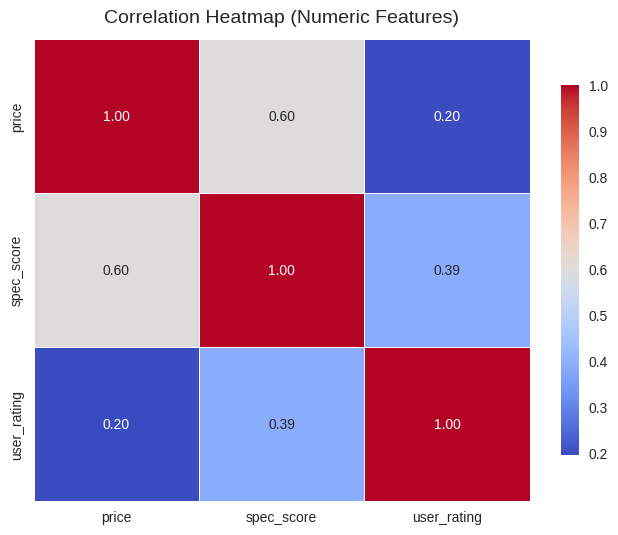

In [48]:
# Tính ma trận tương quan (correlation matrix) giữa các cột numeric
corr = raw_data[num_cols].corr()

# Vẽ heatmap để trực quan hóa mối quan hệ
plt.figure(figsize=(8,6))
sns.heatmap(corr,
            annot=True,       # hiện giá trị hệ số tương quan
            cmap="coolwarm",  # bảng màu xanh-đỏ
            fmt=".2f",        # 2 chữ số thập phân
            linewidths=0.5,   # khoảng cách giữa các ô
            cbar_kws={"shrink": 0.8})  # thu nhỏ thanh màu bên cạnh

plt.title("Correlation Heatmap (Numeric Features)", fontsize=14, pad=12)
plt.show()

**Nhận xét chi tiết:**

1. Price – Spec_score (0.60)

- Tương quan dương khá mạnh.

- Thực tế thì điện thoại có cấu hình cao thường có giá bán cao.

- Đây là mối quan hệ logic hợp lý và quan trọng cho mô hình dự đoán giá.

2. Price – User_rating (0.20)

- Tương quan dương yếu.

- Giá bán và đánh giá người dùng gần như không liên hệ chặt chẽ.

- Điện thoại đắt tiền chưa chắc được người dùng chấm điểm cao, và ngược lại.

3. Spec_score – User_rating (0.39)

- Tương quan dương mức trung bình.

- Cấu hình tốt thường nhận được đánh giá cao hơn.

**Kết luận:**

- Spec_score là biến giải thích quan trọng cho Price.

- User_rating có mối quan hệ yếu với Price, nhưng vẫn có ý nghĩa bổ sung (vì thể hiện trải nghiệm thực tế).

- Không có cặp biến nào quá trùng lặp (correlation > 0.8), do đó không lo hiện tượng multicollinearity nghiêm trọng.

Tiền xử lý dữ liệu:

In [49]:
#Tách ra các đặc trưng mới
raw_data['battery_num'] = raw_data['battery'].apply(extract_battery)
raw_data['fast_charging'] = raw_data['battery'].apply(extract_fast_charging)
raw_data['ram_num'] = raw_data['ram'].apply(extract_ram)
raw_data['rom_num'] = raw_data['ram'].apply(extract_rom)
raw_data['screen_size'] = raw_data['display'].apply(extract_screen_size)
raw_data['refresh_rate'] = raw_data['display'].apply(extract_refresh_rate)
raw_data['ppi'] = raw_data['display'].apply(extract_ppi)
raw_data['rear_camera_prio'] = raw_data['camera'].apply(extract_rear)
raw_data['front_camera_prio'] = raw_data['camera'].apply(extract_front_camera)
raw_data['expandable_storage'] = raw_data['expandable'].apply(extract_expandable_storage)
raw_data['os'] = raw_data['os'].apply(extract_os)
raw_data['cpu_brand'] = raw_data['cpu'].apply(extract_cpu_brand)
raw_data['cpu_speed'] = raw_data['cpu'].apply(extract_cpu_speed)
raw_data['cpu_core'] = raw_data['cpu'].apply(extract_cpu_core)
raw_data['is_5g'] = raw_data['connectivity'].apply(extract_is_5g)
raw_data['is_dual_sim'] = raw_data['connectivity'].apply(extract_is_dual_sim)
raw_data['is_nfc'] = raw_data['connectivity'].apply(extract_is_nfc)

In [50]:
#Tính missing ratio
missing_ratio = (raw_data.isna().sum())/raw_data.shape[0] *100
print(missing_ratio)

# Giữ lại các cột quan trọng cho mô hình, loại bỏ cột không cần thiết
keep_col = ['price', 'name', 'spec_score', 'user_rating','battery_num', 'fast_charging', 'ram_num', 'rom_num', 'os', 'screen_size', 'ppi', 'rear_camera_prio',
            'front_camera_prio', 'expandable_storage', 'cpu_brand', 'cpu_speed', 'cpu_core', 'is_5g', 'is_dual_sim', 'is_nfc']
raw_data = raw_data[keep_col] #dữ liệu sau khi bỏ bớt các đặc trưng không cần thiết

name                   0.000000
price                  0.000000
spec_score             0.067877
user_rating            0.169693
connectivity           0.093331
cpu                   18.301375
ram                   10.699135
battery                1.170881
display                0.135754
camera                 0.169693
expandable            15.017818
os                     0.000000
fm_radio              86.789411
other                 99.991515
battery_num            1.170881
fast_charging          1.170881
ram_num               32.750721
rom_num               27.244188
screen_size           14.712371
refresh_rate          74.512133
ppi                   15.645681
rear_camera_prio       3.385372
front_camera_prio     26.972679
expandable_storage    28.202953
cpu_brand              0.000000
cpu_speed             22.518242
cpu_core              22.883082
is_5g                  0.000000
is_dual_sim            0.000000
is_nfc                 0.000000
dtype: float64


In [51]:
# Danh sách các cột số cần kiểm tra outlier
num_feature = ['spec_score','ppi','ram_num','rom_num','cpu_speed', 'cpu_core', 'rear_camera_prio','front_camera_prio',
               'user_rating', 'battery_num', 'expandable_storage', 'screen_size', 'fast_charging', 'is_5g', 'is_dual_sim', 'is_nfc']
cat_feature = ['cpu_brand','os']

# Hàm phát hiện outlier dựa vào quy tắc IQR
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

# Kiểm tra từng cột
for col in num_feature:
    outliers = detect_outliers_iqr(raw_data[col])
    print(f"Number of outliers in {col}: {len(outliers)}")

Number of outliers in spec_score: 0
Number of outliers in ppi: 3
Number of outliers in ram_num: 116
Number of outliers in rom_num: 269
Number of outliers in cpu_speed: 64
Number of outliers in cpu_core: 0
Number of outliers in rear_camera_prio: 96
Number of outliers in front_camera_prio: 314
Number of outliers in user_rating: 853
Number of outliers in battery_num: 41
Number of outliers in expandable_storage: 1146
Number of outliers in screen_size: 0
Number of outliers in fast_charging: 0
Number of outliers in is_5g: 2818
Number of outliers in is_dual_sim: 1269
Number of outliers in is_nfc: 0


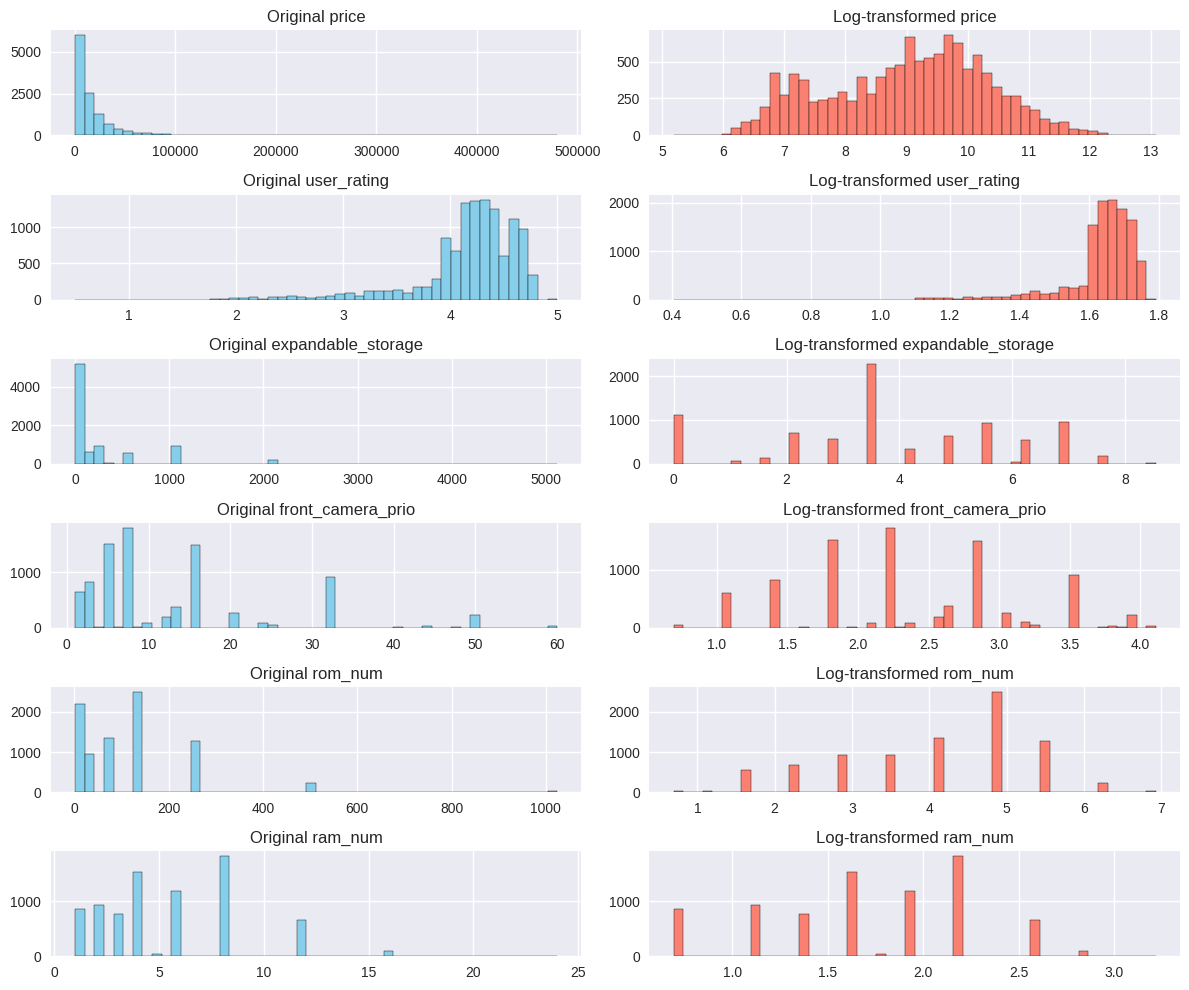

In [52]:
df_log = raw_data.copy()

# Log transform biến nhiều outlier
for col in ['price', 'user_rating', 'expandable_storage', 'front_camera_prio', 'rom_num', 'ram_num']:
    df_log[col + '_log'] = np.log1p(raw_data[col])  # log(1+x) để tránh log(0)

# Vẽ so sánh
fig, axes = plt.subplots(6, 2, figsize=(12, 10))

for i, col in enumerate(['price', 'user_rating', 'expandable_storage', 'front_camera_prio', 'rom_num', 'ram_num']):
    # Histogram gốc
    axes[i,0].hist(raw_data[col].dropna(), bins=50, color='skyblue', edgecolor='black')
    axes[i,0].set_title(f"Original {col}")

    # Histogram log
    axes[i,1].hist(df_log[col + '_log'].dropna(), bins=50, color='salmon', edgecolor='black')
    axes[i,1].set_title(f"Log-transformed {col}")

plt.tight_layout()
plt.show()

raw_data['user_rating'] = df_log['user_rating_log']
raw_data['expandable_storage'] = df_log['expandable_storage_log']
raw_data['front_camera_prio'] = df_log['front_camera_prio_log']
raw_data['rom_num'] = df_log['rom_num_log']
raw_data['ram_num'] = df_log['ram_num_log']

**Nhận xét:**

1. Price

- Trước log: phân phối lệch phải mạnh, nhiều giá trị nhỏ, một số rất lớn kéo dài đuôi phải.

- Sau log: dữ liệu trở nên gần chuẩn, đối xứng hơn, tập trung quanh giá trị trung bình.

- Log-transform cải thiện rõ rệt, giảm ảnh hưởng outlier.

2. User_rating

- Trước log: phân phối tập trung cao ở mức 4–5 điểm, lệch phải nhẹ, ít giá trị thấp.

- Sau log: phân phối dịch sang trái, bớt lệch nhưng không thay đổi bản chất (vẫn tập trung cao ở một khoảng hẹp).

- Log-transform không đem lại nhiều ý nghĩa vì bản thân dữ liệu đã ít outlier.

3. Expandable_storage

- Trước log: phân phối rời rạc, nhiều cụm giá trị (0, 512MB, 1GB, 2GB, …).

- Sau log: dữ liệu nén lại, phân bố đều hơn giữa các mức.

- Log-transform giúp rõ ràng hơn nhưng dữ liệu vốn mang tính discrete nên hiệu quả hạn chế.

4. Front_camera_prio

- Trước log: phân phối nhiều đỉnh (multimodal), rời rạc.

- Sau log: dữ liệu co cụm hơn, phân bố mượt hơn.

- Log-transform cải thiện phần nào, nhưng bản chất dữ liệu discrete nên không hoàn toàn chuẩn hóa được.

5. Rom_num

- Trước log: lệch phải rất mạnh, nhiều giá trị nhỏ, một số cực lớn.

- Sau log: phân phối gần chuẩn, cân đối hơn.

- Log-transform hữu ích rõ rệt.

6. Ram_num

- Trước log: lệch phải, nhiều giá trị thấp, một số giá trị cao kéo dài đuôi phải.

- Sau log: dữ liệu trở nên phân bố đều hơn, giảm lệch.

- Log-transform hiệu quả.

**Kết luận:**

- Các biến có giá trị lệch mạnh và nhiều outlier như price, ram_num, rom_num được cải thiện rõ rệt sau log-transform, phân phối trở nên gần chuẩn, giúp mô hình học tốt hơn.

- Một số biến rời rạc/discrete như expandable_storage, front_camera_prio được nén lại nhưng vẫn còn đặc trưng nhảy bậc.

- Biến user_rating vốn đã phân phối hẹp, log-transform không thay đổi nhiều, có thể cân nhắc giữ nguyên.

In [53]:
#Chia target(price) thành biến phân loại để áp dụng các mô hình: Logistic Regression, SVM, Random Forest
low_threshold = raw_data['price'].quantile(0.25)
high_threshold = raw_data['price'].quantile(0.75)

def categorize_price(price):
    if price <= low_threshold:
        return 'low'
    elif price <= high_threshold:
        return 'medium'
    else:
        return 'high'
raw_data['price_category'] = raw_data['price'].apply(categorize_price)
target = 'price_category'

Bắt đầu phần 2

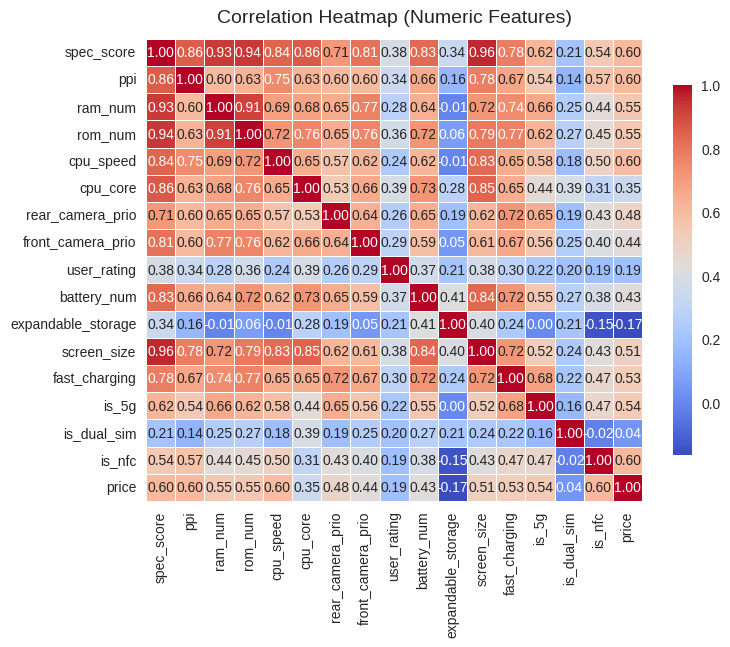

In [54]:
# Tính ma trận tương quan cho các biến số
num_feature_with_price = num_feature + ['price']
corr = raw_data[num_feature_with_price].corr()

# Vẽ heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr,
            annot=True,       # hiện giá trị hệ số tương quan
            cmap="coolwarm",  # bảng màu xanh-đỏ
            fmt=".2f",        # 2 chữ số thập phân
            linewidths=0.5,   # khoảng cách giữa các ô
            cbar_kws={"shrink": 0.8})  # thu nhỏ thanh màu bên cạnh

plt.title("Correlation Heatmap (Numeric Features)", fontsize=14, pad=12)
plt.show()

1. Nhóm có tương quan rất cao (≥ 0.9)

- spec_score - ram_num (0.93), rom_num (0.94), cpu_speed (0.84), ppi (0.86), screen_size (0.96).

- Điều này hợp lý: điểm cấu hình (spec_score) vốn được tính dựa trên RAM, ROM, CPU, màn hình… nên mối quan hệ chặt chẽ.

- Rủi ro: multicollinearity, các biến này mang thông tin trùng lặp.

2. Nhóm có tương quan trung bình (0.5 – 0.7)

- spec_score - rear_camera_prio (0.71), front_camera_prio (0.81), fast_charging (0.78).

- battery_num: ram_num (0.66), rom_num (0.64), screen_size (0.62).

- Các yếu tố camera, pin, sạc nhanh có liên quan nhưng không phải thành phần chính trong điểm cấu hình.

3. Nhóm có tương quan yếu (< 0.4)

- user_rating - các biến còn lại (0.28 – 0.39).

- expandable_storage hầu hết tương quan rất thấp (~0.2–0.3).

- is_dual_sim, is_5g, is_nfc tương quan thấp với các biến khác (0.2–0.5).

- Đây là các đặc trưng bổ sung, độc lập, có thể thêm giá trị riêng cho mô hình.

4. Price (target)

- price có mức tương quan trung bình (~0.55–0.60) với một số đặc trưng như ram_num, rom_num, spec_score.

- Điều này hợp lý vì giá điện thoại ngoài cấu hình còn phụ thuộc vào thương hiệu, năm ra mắt, chính sách thị trường…, nên tương quan không quá cao.

- Tuy nhiên, chính vì phản ánh thực tế khách quan, price được chọn làm target thay vì spec_score (vốn chỉ là điểm số tổng hợp từ các đặc trưng khác).

5. Nhận xét tổng quát

- Có sự đa cộng tuyến mạnh giữa spec_score và các biến cấu phần (ram_num, rom_num, cpu_speed, ppi, screen_size). Khi đưa vào mô hình tuyến tính cần chọn lọc, tránh đưa tất cả.

- user_rating và expandable_storage ít tương quan → có thể giữ lại như yếu tố bổ sung.

- Các biến nhị phân (is_5g, is_dual_sim, is_nfc) mang thông tin độc lập, không trùng lặp, nên hữu ích cho dự đoán.

- price được giữ lại trong EDA để kiểm tra tương quan, nhưng khi train mô hình phải bỏ ra (target đã tách thành price_category).

Do dữ liệu gồm các đặc trưng phân loại rời rạc (cpu_brand, os), không có thứ tự tự nhiên nên chỉ sử dụng One-Hot Encoding

Thử mô hình Logistic Regression với các cấu hình khác nhau

In [55]:
#Logistic Regression với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=LogisticRegression(max_iter=500),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='standard',
    n_components=12,
)

print ("Các độ đo của mô hình LR với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 12 chiều:")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Logistic Regression với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 8 chiều
metrics, pipe = run_model(
    model=LogisticRegression(max_iter=500),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='standard',
    n_components=8,
)

print ("Các độ đo của mô hình LR với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 8 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')


#Logistic Regression với KNN Imputer với n_neighbors = 10, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=LogisticRegression(max_iter=500),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=10,
    imputer='knn',
    scaler='standard',
    n_components=12,
)
print ("Các độ đo của mô hình LR với KNN Imputer với n_neighbors = 10, standard scaler, PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Logistic Regression với Simple Imputer sử dụng mean, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=LogisticRegression(max_iter=500),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='mean',
    scaler='standard',
    n_components=12,
)
print ("Các độ đo của mô hình LR với Simple Imputer sử dụng mean, standard scaler, PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Logistic Regression với Simple Imputer sử dụng median, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=LogisticRegression(max_iter=500),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='median',
    scaler='standard',
    n_components=12,
)
print ("Các độ đo của mô hình LR với Simple Imputer sử dụng median, standard scaler, PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Logistic Regression với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=LogisticRegression(max_iter=500),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='minmax',
    n_components=12,
)
print ("Các độ đo của mô hình LR với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Logistic Regression với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 10), PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=LogisticRegression(max_iter=500),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 10),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='minmax',
    n_components=12,
)
print ("Các độ đo của mô hình LR với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 10), PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Logistic Regression với Simple Imputer sử dụng mean, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=LogisticRegression(max_iter=500),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 10),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='minmax',
    n_components=12,
)
print ("Các độ đo của mô hình LR với Simple Imputer sử dụng mean, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

Các độ đo của mô hình LR với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 12 chiều:
                            Score
Accuracy                 0.862171
Precision (macro)        0.864585
Recall (macro)           0.860116
F1-score (macro)         0.862180
Explained Variance (%)  95.030000


Các độ đo của mô hình LR với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 8 chiều:

                            Score
Accuracy                 0.854538
Precision (macro)        0.856602
Recall (macro)           0.853194
F1-score (macro)         0.854777
Explained Variance (%)  89.920000


Các độ đo của mô hình LR với KNN Imputer với n_neighbors = 10, standard scaler, PCA giữ lại 12 chiều:

                            Score
Accuracy                 0.861747
Precision (macro)        0.864390
Recall (macro)           0.859310
F1-score (macro)         0.861609
Explained Variance (%)  95.000000


Các độ đo của mô hình LR với Simple Imputer sử dụng mean, standard scaler, PC

Thử mô hình SVC với các cấu hình khác nhau

In [56]:
#SVC với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=SVC(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='standard',
    n_components=12,
)

print ("Các độ đo của mô hình SVC với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 12 chiều:")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#SVC với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 8 chiều
metrics, pipe = run_model(
    model=SVC(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='standard',
    n_components=8,
)

print ("Các độ đo của mô hình SVC với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 8 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')


#SVC với KNN Imputer với n_neighbors = 10, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=SVC(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=10,
    imputer='knn',
    scaler='standard',
    n_components=12,
)
print ("Các độ đo của mô hình SVC với KNN Imputer với n_neighbors = 10, standard scaler, PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#SVC với Simple Imputer sử dụng mean, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=SVC(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='mean',
    scaler='standard',
    n_components=12,
)
print ("Các độ đo của mô hình SVC với Simple Imputer sử dụng mean, standard scaler, PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#SVC với Simple Imputer sử dụng median, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=SVC(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='median',
    scaler='standard',
    n_components=12,
)
print ("Các độ đo của mô hình SVC với Simple Imputer sử dụng median, standard scaler, PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#SVC với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=SVC(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='minmax',
    n_components=12,
)
print ("Các độ đo của mô hình SVC với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#SVC với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 10), PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=SVC(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 10),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='minmax',
    n_components=12,
)
print ("Các độ đo của mô hình SVC với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 10), PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#SVC với Simple Imputer sử dụng mean, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=SVC(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 10),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='minmax',
    n_components=12,
)
print ("Các độ đo của mô hình SVC với Simple Imputer sử dụng mean, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

Các độ đo của mô hình SVC với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 12 chiều:
                            Score
Accuracy                 0.872774
Precision (macro)        0.880750
Recall (macro)           0.865046
F1-score (macro)         0.872129
Explained Variance (%)  95.030000


Các độ đo của mô hình SVC với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 8 chiều:

                            Score
Accuracy                 0.860051
Precision (macro)        0.863751
Recall (macro)           0.857436
F1-score (macro)         0.860449
Explained Variance (%)  89.920000


Các độ đo của mô hình SVC với KNN Imputer với n_neighbors = 10, standard scaler, PCA giữ lại 12 chiều:

                            Score
Accuracy                 0.874894
Precision (macro)        0.881634
Recall (macro)           0.868380
F1-score (macro)         0.874394
Explained Variance (%)  95.000000


Các độ đo của mô hình SVC với Simple Imputer sử dụng mean, standard scaler

Thử mô hình Random Forest với các cấu hình khác nhau

In [57]:
#Random Forest không cần encoder trước
#Random Forest với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=RandomForestClassifier(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='standard',
    n_components=12,
)

print ("Các độ đo của mô hình Random Forest với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 12 chiều:")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Random Forest với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 8 chiều
metrics, pipe = run_model(
    model=RandomForestClassifier(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='standard',
    n_components=8,
)

print ("Các độ đo của mô hình Random Forest với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 8 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')


#Random Forest với KNN Imputer với n_neighbors = 10, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=RandomForestClassifier(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=10,
    imputer='knn',
    scaler='standard',
    n_components=12,
)
print ("Các độ đo của mô hình Random Forest với KNN Imputer với n_neighbors = 10, standard scaler, PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Random Forest với Simple Imputer sử dụng mean, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=RandomForestClassifier(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='mean',
    scaler='standard',
    n_components=12,
)
print ("Các độ đo của mô hình Random Forest với Simple Imputer sử dụng mean, standard scaler, PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Random Forest với Simple Imputer sử dụng median, standard scaler, PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=RandomForestClassifier(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='median',
    scaler='standard',
    n_components=12,
)
print ("Các độ đo của mô hình Random Forest với Simple Imputer sử dụng median, standard scaler, PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Random Forest với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=RandomForestClassifier(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 1),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='minmax',
    n_components=12,
)
print ("Các độ đo của mô hình Random Forest với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Random Forest với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 10), PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=RandomForestClassifier(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 10),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='minmax',
    n_components=12,
)
print ("Các độ đo của mô hình Random Forest với KNN Imputer với n_neighbors = 5, minmax scaler với feature_range = (0, 10), PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

#Random Forest với Simple Imputer sử dụng mean, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều
metrics, pipe = run_model(
    model=RandomForestClassifier(),
    num_feature=num_feature,
    cat_feature=cat_feature,
    data=cleaned_data,
    target='price_category',
    feature_range=(0, 10),
    test_size=0.2,
    random_state=42,
    n_neighbors=5,
    imputer='knn',
    scaler='minmax',
    n_components=12,
)
print ("Các độ đo của mô hình Random Forest với Simple Imputer sử dụng mean, minmax scaler với feature_range = (0, 1), PCA giữ lại 12 chiều:\n")
df = pd.DataFrame(metrics, index=["Score"])
print(df.T)
print('\n')

Các độ đo của mô hình Random Forest với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 12 chiều:
                            Score
Accuracy                 0.877014
Precision (macro)        0.877762
Recall (macro)           0.877389
F1-score (macro)         0.877573
Explained Variance (%)  95.030000


Các độ đo của mô hình Random Forest với KNN Imputer với n_neighbors = 5, standard scaler, PCA giữ lại 8 chiều:

                            Score
Accuracy                 0.861747
Precision (macro)        0.861719
Recall (macro)           0.863236
F1-score (macro)         0.862370
Explained Variance (%)  89.920000


Các độ đo của mô hình Random Forest với KNN Imputer với n_neighbors = 10, standard scaler, PCA giữ lại 12 chiều:

                            Score
Accuracy                 0.877014
Precision (macro)        0.877116
Recall (macro)           0.878305
F1-score (macro)         0.877704
Explained Variance (%)  95.000000


Các độ đo của mô hình Random Forest với Simp

**Kết luận:**

Sau khi thử nghiệm nhiều lựa chọn tiền xử lý và mô hình, có thể thấy kết quả giữa các mô hình không chênh lệch quá lớn, dao động trong khoảng 0.85–0.88 Accuracy. Trong đó, Random Forest với KNN Imputer (n=5), Standard Scaler và PCA giữ lại 12 chiều đạt hiệu năng cao nhất (Accuracy ~0.877, F1-score ~0.877). Mô hình SVC cũng cho kết quả gần tương tự, trong khi Logistic Regression thấp hơn nhưng phù hợp làm baseline. Do mục tiêu của bài tập là so sánh và đánh giá, nhóm kết luận rằng Random Forest là mô hình tốt nhất trong thí nghiệm này, tuy nhiên cả ba mô hình đều có thể sử dụng được tùy theo nhu cầu cân bằng giữa hiệu quả và khả năng giải thích.